In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append("..")

In [3]:
# Create optimus
from optimus import Optimus
op = Optimus(master="local[*]", app_name = "optimus" ,verbose =True, checkpoint= True)

Just check that Spark and all necessary environments vars are present...
-----
SPARK_HOME=C:\opt\spark\spark-2.3.1-bin-hadoop2.7
HADOOP_HOME=C:\opt\spark\spark-2.3.1-bin-hadoop2.7
You don't have PYSPARK_PYTHON set
You don't have PYSPARK_DRIVER_PYTHON set
JAVA_HOME=C:\Program Files\Java\jdk1.8.0_181
Pyarrow Installed
-----
Starting or getting SparkSession and SparkContext...

                             ____        __  _                     
                            / __ \____  / /_(_)___ ___  __  _______
                           / / / / __ \/ __/ / __ `__ \/ / / / ___/
                          / /_/ / /_/ / /_/ / / / / / / /_/ (__  ) 
                          \____/ .___/\__/_/_/ /_/ /_/\__,_/____/  
                              /_/                                  
                              
Transform and Roll out...
Setting checkpoint folder local. If you are in a cluster initialize Optimus with master='your_ip' as param
Deleting previous folder if exists...
Creating the

### Benchmark 

In [4]:
df = op.load.csv("C:\\Users\\argenisleon\\Desktop\\order_products__prior.csv")

In [5]:
df.table()

order_id 1 (int),product_id 2 (int),add_to_cart_order 3 (int),reordered 4 (int)
2,33120,1,1
2,28985,2,1
2,9327,3,0
2,45918,4,1
2,30035,5,0
2,17794,6,1
2,40141,7,1
2,1819,8,1
2,43668,9,0
3,33754,1,1


Processing column 'product_id'...
percentile
12.428871233101177
percentile
13.294262981479164
percentile
12.101534748881022
Using 'column_exp' to process column 'product_id_buckets' with function _bucketizer
bucketizer
0.27864982148264517


Number of columns,4
Number of rows,32434489
Total Missing (%),0.0%
Total size in memory,58.9MiB
Categorical,0
Numeric,1
Date,0
Bool,
Not available,0
Distinct count,45888
Unique (%),0.141

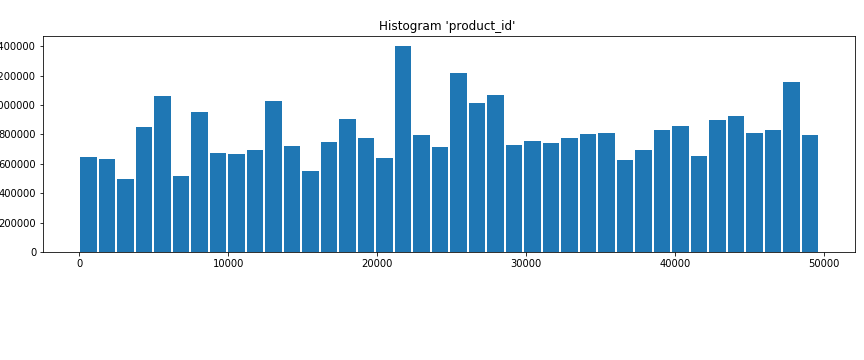
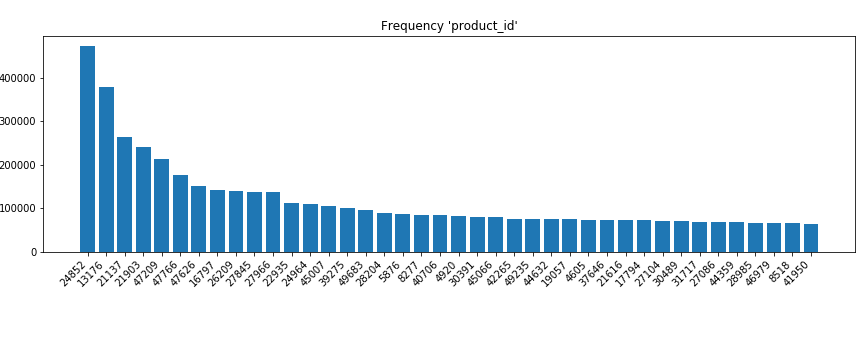

161.76729593380855

In [9]:
import timeit
start_time = timeit.default_timer()
op.profiler.run(df, "product_id", relative_error=0.5)
timeit.default_timer() - start_time

In [10]:
df.approxQuantile("product_id", [0.05, 0.25, 0.5, 0.75, 0.95], 0.5)

[1.0, 1.0, 1.0, 49688.0, 49688.0]